In [88]:
%matplotlib inline

import numpy as np
import os
import sys
import random
import math
import matplotlib as plt

radius = 10
num = 300
input_data = np.random.uniform(-radius, radius, (num, 2))

def kmeans(input_data, k):
    # perform k-means clustering
    # ref: https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/kmeans.html

    # initialize mean vectors
    prev_means = np.random.uniform(0, 10, (k, 2))
    cur_means = np.random.uniform(0, 10, (k, 2))
    
    # mapping array showing that which cluster a point belongs to
    clusters = np.random.randint(0, k, input_data.shape[0])

    # repeat until there are no changes in mean vectors
    while (prev_means != cur_means).all():
        prev_means = cur_means.copy()

        # Step 1: use the estimated means to classify data samples
        for i, data in enumerate(input_data):
            min_mean = 0 # index of mean
            min_dist = 9999  # current minimum distance

            # data => [x, y]
            # check which centroid is the nearest
            for j, mean in enumerate(cur_means):
                dist = distance(data, mean)
                if dist < min_dist:
                    min_mean = j
                    min_dist = dist

            # update the cluster this point belongs to
            clusters[i] = min_mean

        # Step 2: replace means with mean of current data samples belonging to cluster i
        for j, mean in enumerate(cur_means):
            indices = np.where(clusters == j)
            samples = input_data[indices]
            if len(samples) != 0:
                cur_means[j] = np.mean(samples, axis=0)

    # return cluster info and means of clusters
    return clusters, cur_means

def distance(p1, p2):
    d1 = p1[0]-p2[0]
    d2 = p1[1]-p2[1]
    return math.sqrt( d1*d1 + d2*d2 )

k = 10
clusters, means = kmeans(input_data, k)
print('*'*50)
print (means)
print (clusters)

[[ 2.00390887  4.37271011]
 [ 3.68518344  8.02697326]
 [ 7.51239346  7.18683752]
 [ 9.03509969  0.79825916]
 [ 1.40531875  1.38409725]
 [ 7.29354268  6.09972986]
 [ 9.60994333  8.26330189]
 [ 0.8032382   5.01910908]
 [ 8.15081101  0.64738377]
 [ 5.12684388  3.73634184]]
[[ 7.35599756  1.47059747]
 [ 4.48209143  5.15967898]
 [ 0.05058491  9.25760651]
 [ 4.30570274  0.08155326]
 [ 5.41075342  5.27306404]
 [ 4.31240867  9.23503725]
 [ 7.09096803  0.63488961]
 [ 0.83709467  1.63725988]
 [ 2.82572352  2.98353532]
 [ 0.70517119  0.91819616]]
start
debug
5
debug
18
debug
6
debug
6
debug
128
debug
8
debug
4
debug
72
debug
40
debug
13
end
start
debug
26
debug
22
debug
9
debug
11
debug
94
debug
7
debug
4
debug
64
debug
45
debug
18
end
**************************************************
[[ 1.1362738   2.86489279]
 [ 1.28175705  8.37568066]
 [ 6.44230901  7.64387924]
 [ 8.63895711  1.44259435]
 [-3.90401093 -4.2630944 ]
 [ 7.56149208  5.57472854]
 [ 8.95700509  8.34890948]
 [-5.8820021   5.90267882

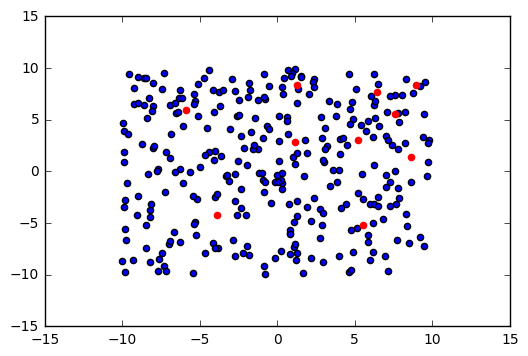

In [89]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x = []
y = []
for data in input_data:
    x.append(data[0])
    y.append(data[1])

mean_x = []
mean_y = []
for mean in means:
    mean_x.append(mean[0])
    mean_y.append(mean[1])

plt.scatter(x, y)
plt.scatter(mean_x, mean_y, color='red')
plt.show()
